# EDA

In this notebook I'll make the rules which could directly predict almost 43-47%(coverage) of data without any Machine Learning Models.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 4]
plt.style.use("fivethirtyeight")

pd.options.display.max_rows=1000

import warnings
warnings.simplefilter('ignore')

/home/kranthi/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def get_data():
    train = pd.read_csv("../data/train.csv")
    test = pd.read_csv("../data/test.csv")
    sub = pd.read_excel("../data/sample_submission.xlsx")

    print(train.shape, test.shape, sub.shape)
    
    return train, test, sub

In [3]:
train, test, sub = get_data()

data = pd.concat([train, test], axis=0)
data['source'] = np.nan
data['source'].iloc[:train.shape[0]] = "train"
data['source'].iloc[train.shape[0]: ] = "test"
data.drop(['IsUnderRisk'], axis=1, inplace=True)

print(data.shape)

(543, 8) (233, 7) (233, 2)
(776, 8)


In [4]:
target = 'IsUnderRisk'
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [5]:
train.nunique()

City                     43
Location_Score          540
Internal_Audit_Score     13
External_Audit_Score     13
Fin_Score                13
Loss_score               10
Past_Results              7
IsUnderRisk               2
dtype: int64

## Univariate

### Target

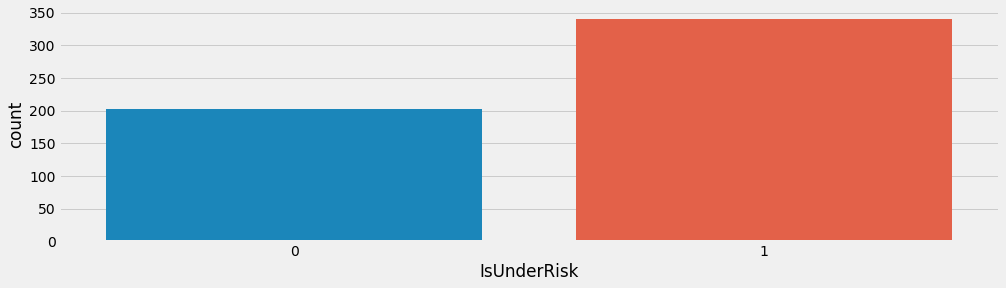

In [6]:
col = 'IsUnderRisk'

sns.countplot(train[col])

### City

In [7]:
col = 'City'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train[col].nunique(), test[col].nunique(),
    len(set(test[col].unique()) - set(train[col].unique())), set(test[col].unique()) - set(train[col].unique())
))

Train Unique : 43
Test Unique :  34
Test - Train : 2 -- [{34, 36}]


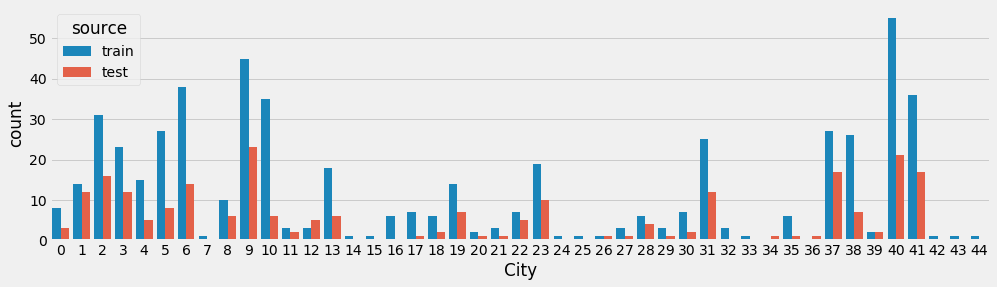

In [8]:
sns.countplot(data[col], hue=data['source'])

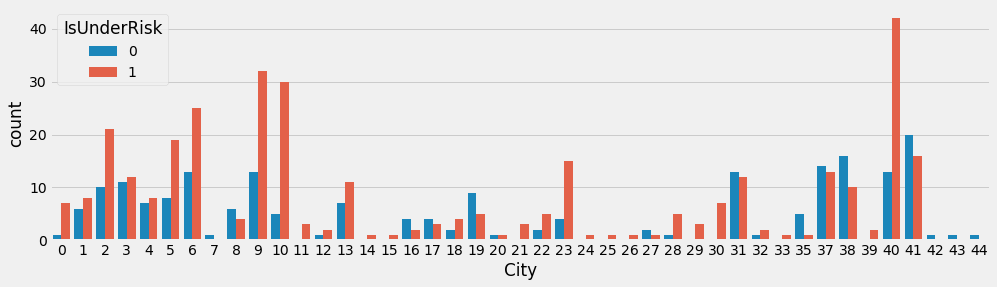

In [9]:
sns.countplot(train[col], hue=train['IsUnderRisk'])

### Location_Score

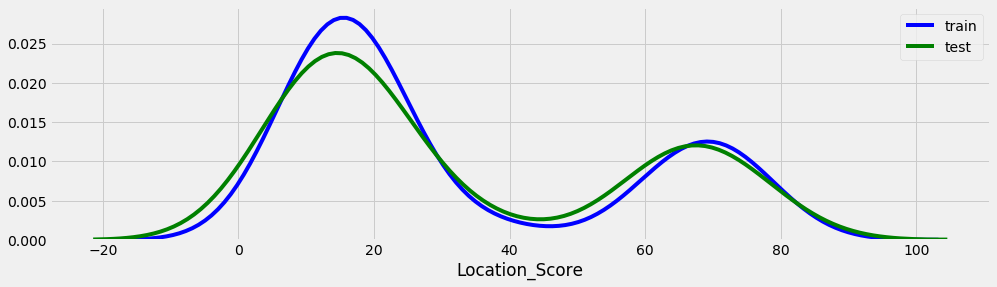

In [10]:
col = 'Location_Score'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

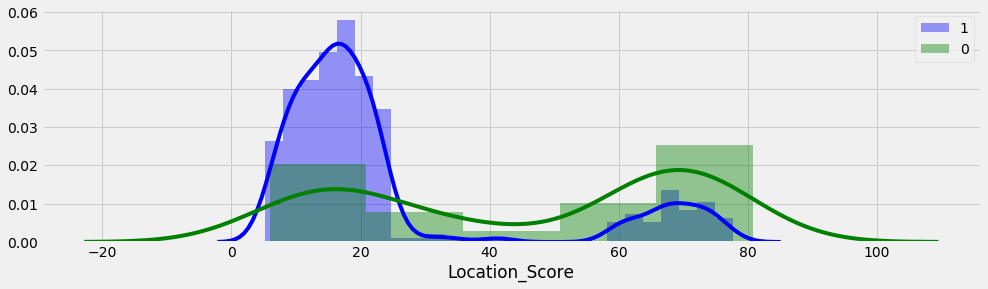

In [11]:
plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1') # , hist=False
sns.distplot(train[col][train[target] == 0], color='g', label='0') # , hist=False
plt.legend(loc='best')
plt.show()

### Internal_Audit_Score

In [12]:
col = "Internal_Audit_Score"

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train[col].nunique(), test[col].nunique(),
    len(set(test[col].unique()) - set(train[col].unique())), set(test[col].unique()) - set(train[col].unique())
))

Train Unique : 13
Test Unique :  13
Test - Train : 0 -- [set()]


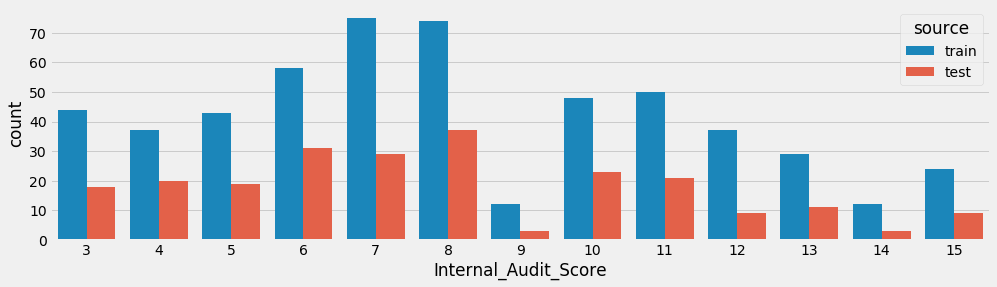

In [13]:
sns.countplot(data[col], hue=data['source'])

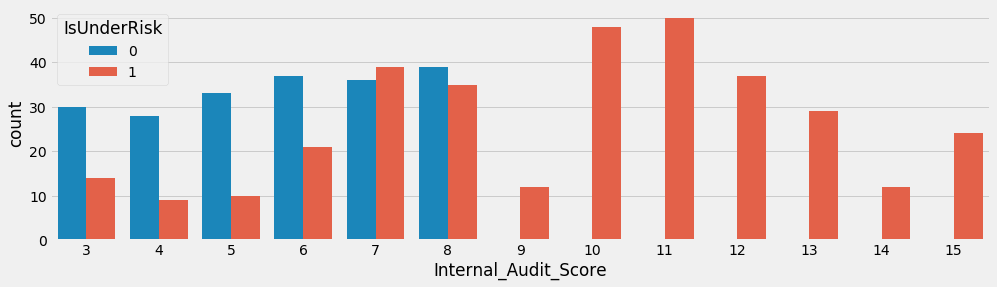

In [14]:
sns.countplot(train[col], hue=train['IsUnderRisk'])

## Rule 1

### We can see that for Internal_Score >=9 target is always == 1.  

### External_Audit_Score

In [15]:
col = "External_Audit_Score"

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train[col].nunique(), test[col].nunique(),
    len(set(test[col].unique()) - set(train[col].unique())), set(test[col].unique()) - set(train[col].unique())
))

Train Unique : 13
Test Unique :  13
Test - Train : 0 -- [set()]


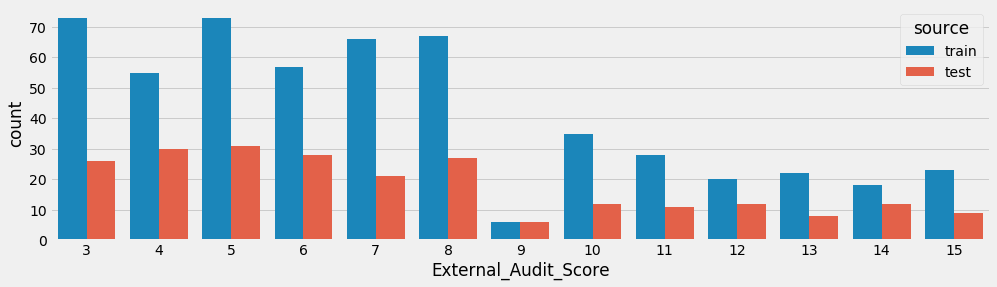

In [16]:
sns.countplot(data[col], hue=data['source'])

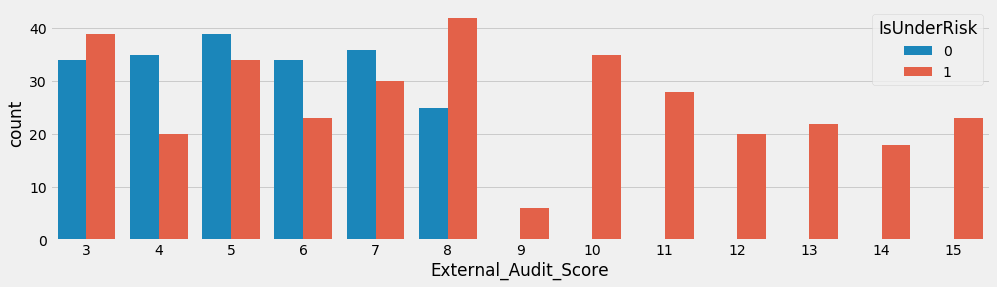

In [17]:
sns.countplot(train[col], hue=train['IsUnderRisk'])

## Rule 2

### We can see that for External_Score >=9 target is always == 1.  

### Fin_Score

In [18]:
col = "Fin_Score"

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train[col].nunique(), test[col].nunique(),
    len(set(test[col].unique()) - set(train[col].unique())), set(test[col].unique()) - set(train[col].unique())
))

Train Unique : 13
Test Unique :  13
Test - Train : 0 -- [set()]


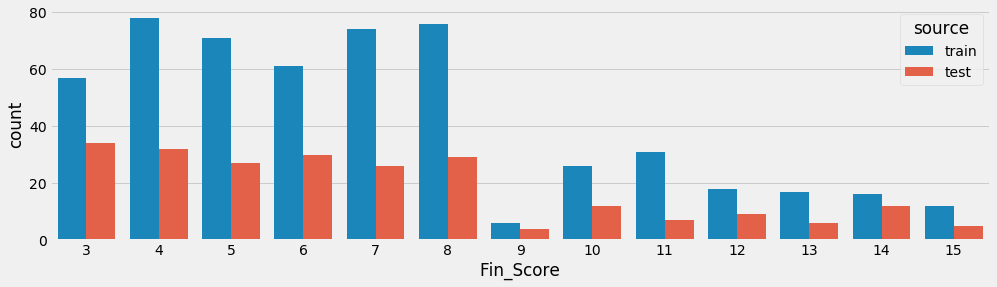

In [19]:
sns.countplot(data[col], hue=data['source'])

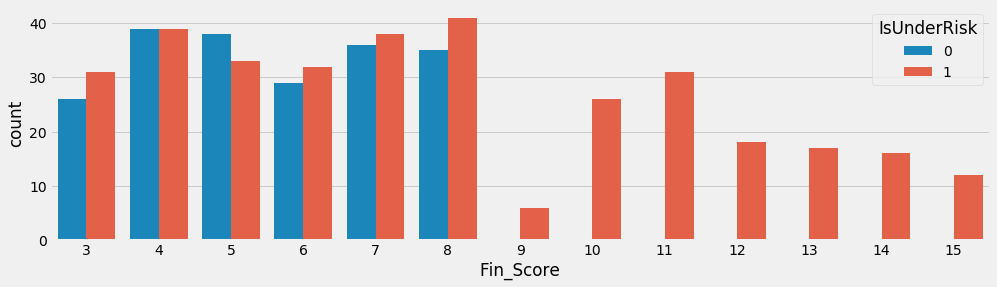

In [20]:
sns.countplot(train[col], hue=train['IsUnderRisk'])

## Rule 3

### We can see that for Fin_Score >=9 target is always == 1.  

### Loss_score

In [21]:
col = "Loss_score"

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train[col].nunique(), test[col].nunique(),
    len(set(test[col].unique()) - set(train[col].unique())), set(test[col].unique()) - set(train[col].unique())
))

Train Unique : 10
Test Unique :  7
Test - Train : 0 -- [set()]


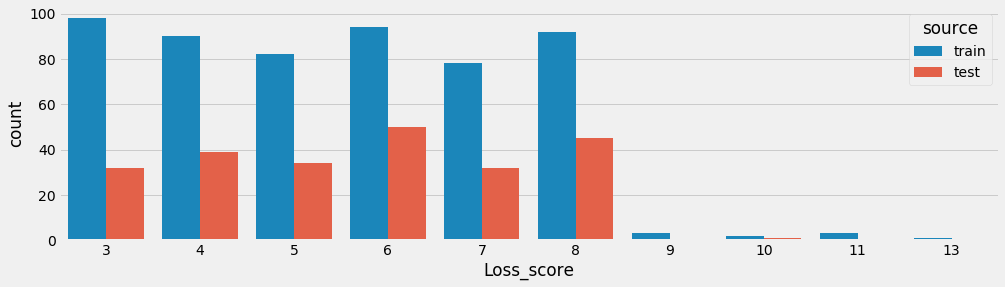

In [22]:
sns.countplot(data[col], hue=data['source'])

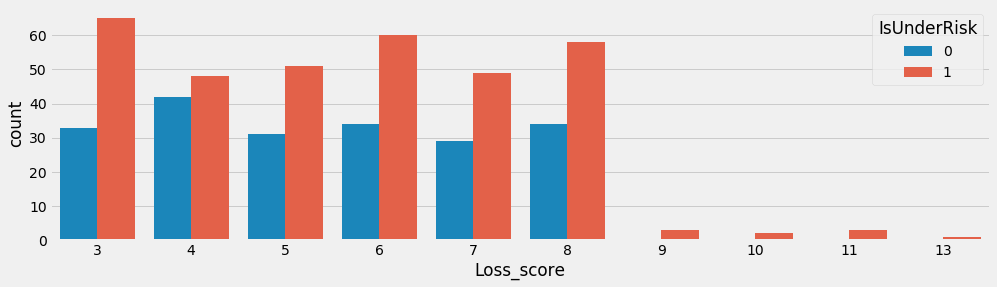

In [23]:
sns.countplot(train[col], hue=train['IsUnderRisk'])

## Rule 4

### We can see that for Loss_Score >=9 target is always == 1.  

### Past_Results

In [24]:
col = "Past_Results"

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train[col].nunique(), test[col].nunique(),
    len(set(test[col].unique()) - set(train[col].unique())), set(test[col].unique()) - set(train[col].unique())
))

Train Unique : 7
Test Unique :  5
Test - Train : 1 -- [{5}]


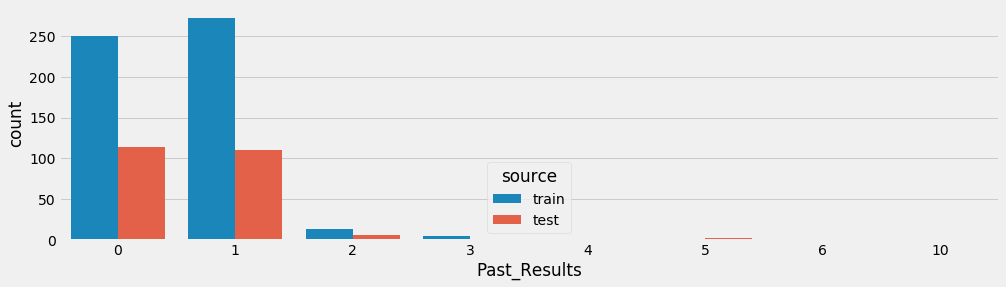

In [25]:
sns.countplot(data[col], hue=data['source'])

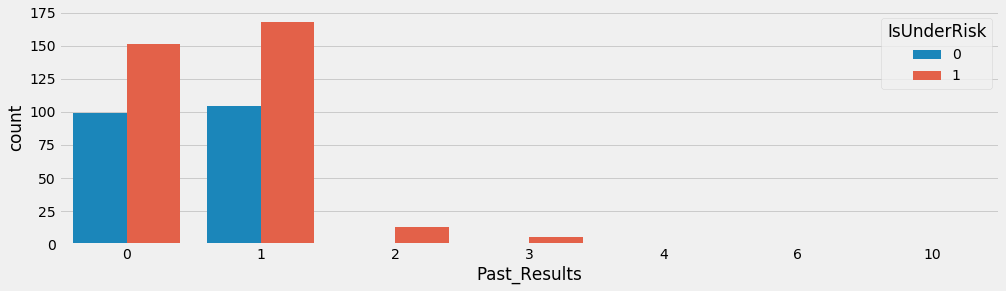

In [26]:
sns.countplot(train[col], hue=train['IsUnderRisk'])

## Rule 5

### We can see that for Past_Results >=2 target is always == 1.  

## All Rules : 

1. Internal_Audit_Score >= 9 ==> Target = 1
1. External_Audit_Score >= 9 ==> Target = 1
1. Final_Score >= 9 ==> Target = 1
1. Loss_score >= 9 ==> Target = 1
1. Past_Results >= 2 ==> Target = 1

### Checking the coverage i.e how much percentage of our rules cover the data.

#### Train Coverage 

In [27]:
print("Train Coverage : {:.2f}%".format((train[
    (train['Internal_Audit_Score'] >= 9) | 
    (train['External_Audit_Score'] >= 9) | 
    (train['Fin_Score'] >= 9) | 
    (train['Loss_score'] >= 9) | 
    (train['Past_Results'] >= 2)
].shape[0] / train.shape[0]) * 100))

Train Coverage : 48.07%


In [28]:
print("Test Coverage : {:.2f}%".format((test[
    (test['Internal_Audit_Score'] >= 9) | 
    (test['External_Audit_Score'] >= 9) | 
    (test['Fin_Score'] >= 9) | 
    (test['Loss_score'] >= 9) | 
    (test['Past_Results'] >= 2)
].shape[0] / test.shape[0]) * 100))

Test Coverage : 47.64%


## Preparing the sub-sample data

This sub-sampled data id devoid of the records which could be predicted by the rules i.e devoid of the 48% of records for train and 47% for test dataset.

In [29]:
def get_rules_ids(df):
    idx_df = df[
        (df['Internal_Audit_Score'] > 8) | 
        (df['External_Audit_Score'] > 8) | 
        (df['Fin_Score'] > 8) | 
        (df['Loss_score'] > 8) | 
        (df['Past_Results'] > 1)
    ].index
    
    return idx_df

idx_train = get_rules_ids(train)
idx_test = get_rules_ids(test)

train_orig = train.copy()
test_orig = test.copy()

train.drop(idx_train, axis=0, inplace=True)
test.drop(idx_test, axis=0, inplace=True)

train.reset_index(inplace=True)
test.reset_index(inplace=True)

train.to_csv("../data/train_1.csv", index=False)
test.to_csv("../data/test_1.csv", index=False)

print("New Train Shape : {}\nNew Test Shape :  {}".format(train.shape, test.shape))

New Train Shape : (282, 9)
New Test Shape :  (122, 8)


In [30]:
import joblib

llist = test_orig.index.values.tolist()
for item in test['index'].values.tolist():
    llist.remove(item)

print(len(llist))
joblib.dump(llist, "already_1_indexes_test.pkl")

111


['already_1_indexes_test.pkl']